In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
common_path = "/Users/michaelpatsais/Documents/Uni_work/machine_learning/Data/archive"

In [69]:
df_train = pd.read_csv(common_path + "/adult_train.csv")
df_train_cols = df_train.columns.to_list()

In [ ]:
# check for correlations, which columns are important to keep

In [123]:
def relabelling(df_name, column_name):

    # extracting unique values from the "class" column of `labels_df` and converting them into a list.
    unique_vals = df_name[str(column_name)].unique().tolist()
    # print(unique_vals)

    # creating an array of integers from 0 to the length of the `labels` list to assign a numerical identifier to each unique label in the dataset.
    val_int = list(range(len(unique_vals)))
    # print(val_int)

    labels_map = dict(zip(unique_vals, val_int))
    # print(labels_map)

    df_name[column_name] = df_train[column_name].map(labels_map)
    # print(df_name[column_name])

    return df_name[column_name]

In [124]:
# Cleaning features - classifying income based on age, race and sex
cols_to_drop = [df_train_cols[1], df_train_cols[2], df_train_cols[3], df_train_cols[4],df_train_cols[5], df_train_cols[6],
                df_train_cols[7], df_train_cols[10], df_train_cols[11], df_train_cols[12], df_train_cols[13], df_train_cols[14]]

features = df_train.drop(cols_to_drop, axis = 1)

# which columns need to be turned into numerical data?
features['age'] = features['age'] #.astype(str)
features['race'] = relabelling(df_train, 'race')
features['sex'] = relabelling(df_train, 'sex')

features = np.array(features)

features = np.expand_dims(features, axis = 2) # expandingg dims for model

In [118]:
# Cleaning label
labels = np.array(relabelling(df_train, 'Income'))

In [119]:
print(labels)
print(features[0].shape)
print(features)

[0 0 0 ... 0 0 1]
(3, 1)
[[[39]
  [ 0]
  [ 0]]

 [[50]
  [ 0]
  [ 0]]

 [[38]
  [ 0]
  [ 0]]

 ...

 [[58]
  [ 0]
  [ 1]]

 [[22]
  [ 0]
  [ 0]]

 [[52]
  [ 0]
  [ 1]]]


In [130]:
# model architecture

#  MODEL CONFIGURATION
batch_size = 100
epochs = 10

val_split = 0.1
dropout = 0.25

input_shape = features[0].shape

model = tf.keras.models.Sequential([

    tf.keras.layers.InputLayer(input_shape=input_shape),

    tf.keras.layers.LSTM(128, activation = "tanh"),

    tf.keras.layers.Dense(64, activation = "leaky_relu"),
    tf.keras.layers.Dropout(dropout),

    # tf.keras.layers.Dense(64, activation = "leaky_relu"),
    # tf.keras.layers.Dropout(dropout),

    tf.keras.layers.Dense(32, activation = "leaky_relu"),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 128)               66560     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 76929 (300.50 KB)
Trainable params: 76929 (300.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
loss_fn = tf.keras.losses.BinaryCrossentropy() #CatagoricalCrossentropy() means 2 output nodes

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [132]:
history = model.fit(features, labels,  validation_split = val_split, batch_size=batch_size, epochs=epochs)

Epoch 1/10
294/294 [==============================] - 3s 6ms/step - loss: 0.4950 - accuracy: 0.7588 - val_loss: 0.4866 - val_accuracy: 0.7531
Epoch 2/10
294/294 [==============================] - 1s 4ms/step - loss: 0.4712 - accuracy: 0.7598 - val_loss: 0.4751 - val_accuracy: 0.7531
Epoch 3/10
294/294 [==============================] - 1s 4ms/step - loss: 0.4680 - accuracy: 0.7591 - val_loss: 0.4745 - val_accuracy: 0.7531
Epoch 4/10
294/294 [==============================] - 1s 4ms/step - loss: 0.4672 - accuracy: 0.7599 - val_loss: 0.4713 - val_accuracy: 0.7531
Epoch 5/10
294/294 [==============================] - 1s 4ms/step - loss: 0.4652 - accuracy: 0.7600 - val_loss: 0.4780 - val_accuracy: 0.7403
Epoch 6/10
294/294 [==============================] - 1s 4ms/step - loss: 0.4660 - accuracy: 0.7587 - val_loss: 0.4714 - val_accuracy: 0.7531
Epoch 7/10
294/294 [==============================] - 1s 4ms/step - loss: 0.4641 - accuracy: 0.7599 - val_loss: 0.4760 - val_accuracy: 0.7531
Epoch 

  N(Epochs)        =  10
  accuracy (train) =  [0.7588042616844177, 0.7597938776016235, 0.759077250957489, 0.7598621249198914, 0.7600327730178833, 0.7586677670478821, 0.7598621249198914, 0.7596232891082764, 0.7593161463737488, 0.7605105042457581]
  accuracy (test)  =  [0.7531470656394958, 0.7531470656394958, 0.7531470656394958, 0.7531470656394958, 0.7402517795562744, 0.7531470656394958, 0.7531470656394958, 0.7531470656394958, 0.7531470656394958, 0.7531470656394958]


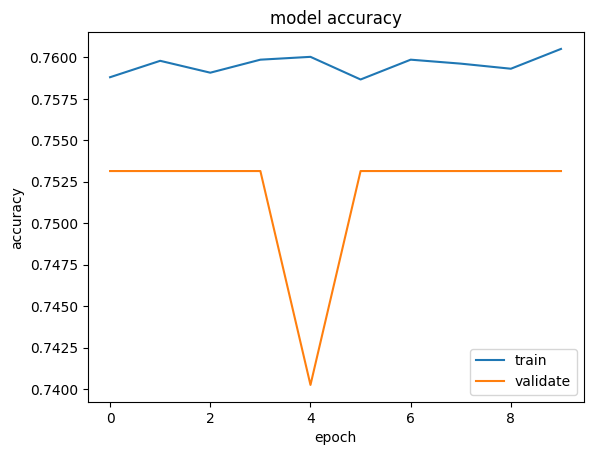

  loss (train)     =  [0.4949730336666107, 0.471150279045105, 0.4680466949939728, 0.4672180414199829, 0.46521684527397156, 0.4660092294216156, 0.46410784125328064, 0.46373558044433594, 0.46456825733184814, 0.46318385004997253]
  loss (test)      =  [0.4865840971469879, 0.47506317496299744, 0.47447681427001953, 0.47133806347846985, 0.4779691994190216, 0.47143667936325073, 0.4760071933269501, 0.4736902415752411, 0.47044309973716736, 0.469309002161026]


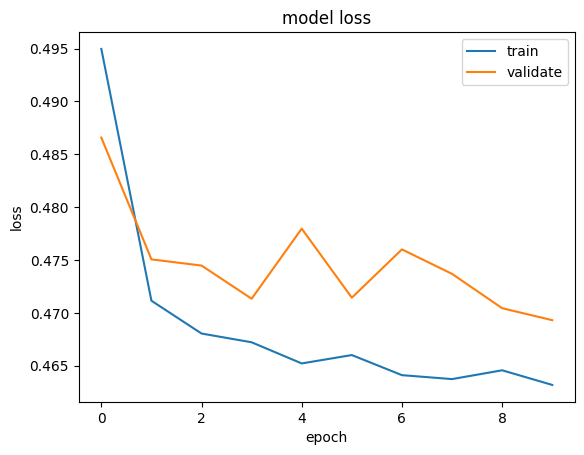

In [133]:
# look at the history
print("  N(Epochs)        = ", epochs)
print("  accuracy (train) = ", history.history['accuracy'])
print("  accuracy (test)  = ", history.history['val_accuracy'])

plt.plot(history.history['accuracy']) # 'accuracy'
plt.plot(history.history['val_accuracy']) # 'val_accuracy'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

print("  loss (train)     = ", history.history['loss'])
print("  loss (test)      = ", history.history['val_loss'])

# summarize history for loss
plt.plot(history.history['loss']) # 'loss'
plt.plot(history.history['val_loss']) # 'val_loss'
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()